# T3

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import seaborn as sb

In [4]:
data = pd.read_csv("T3_features_final.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X = np.asarray(X)
y = np.asarray(y)

In [5]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.08333333333333333


In [7]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.16666666666666666


In [53]:
gb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
gb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", gb_accuracy)

Accuracy: 0.3333333333333333


In [8]:
# Create a logistic regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier = LogisticRegression(max_iter=1000)
# Train the classifier
logreg_classifier.fit(X_train, y_train)


# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.5


In [10]:
from keras.models import Sequential, load_model
from keras.layers import Dense

In [11]:
norm = Normalizer(norm='max')
norm.fit(X_train)
X_train = norm.transform(X_train)

In [13]:
from keras.regularizers import l1, l2
from keras.callbacks import ModelCheckpoint
model1 = Sequential()
model1.add(Dense(512, activation='relu',kernel_regularizer=l1(0.01),input_dim=7))
model1.add(Dense(512, activation='relu',kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Create a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model_T3.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model with the callback
model1.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Load the best model
model1 = load_model('best_model_T3.h5')

# Make predictions on the test set
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the accuracy of the model
ann_accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", ann_accuracy)

Epoch 1/1000
1/2 [==============>...............] - ETA: 2s - loss: 7.7373 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.16667, saving model to best_model_T3.h5
2/2 [==============================] - 3s 713ms/step - loss: 7.6591 - accuracy: 0.5417 - val_loss: 17.7568 - val_accuracy: 0.1667
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 7.2517 - accuracy: 0.6875
Epoch 2: val_accuracy did not improve from 0.16667
2/2 [==============================] - 0s 121ms/step - loss: 7.1899 - accuracy: 0.6667 - val_loss: 23.2479 - val_accuracy: 0.1667
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 6.7982 - accuracy: 0.7188
Epoch 3: val_accuracy did not improve from 0.16667
2/2 [==============================] - 0s 139ms/step - loss: 6.7589 - accuracy: 0.6667 - val_loss: 25.7553 - val_accuracy: 0.1667
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 6.4175 - accuracy: 0.6562
Epoch 4: val_accuracy did not improve from 0.1

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import Callback
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from keras.regularizers import l1, l2
from keras.optimizers import Adam, RMSprop, SGD, Adagrad
from keras.activations import relu, sigmoid, tanh

# Define a function to create your model (to be used by HalvingGridSearchCV)
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_layers=1, neurons=256, kernel_regularizer=None, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_dim=7, kernel_regularizer=kernel_regularizer))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation, kernel_regularizer=kernel_regularizer))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'adagrad':
        opt = Adagrad(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer.")
        
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the hyperparameters to search
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd', 'adagrad'],
    'batch_size': [32, 64],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'dropout_rate': [0.0, 0.2, 0.4],
    'hidden_layers': [1, 2, 3],
    'neurons': [256, 512, 1024],
    'kernel_regularizer': [None, l1(0.01), l2(0.01)],
    'learning_rate': [0.001, 0.01, 0.1]
}

class BestModelCallback(Callback):
    def __init__(self):
        self.best_accuracy = -np.inf
        self.best_model = None

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')
        if current_val_accuracy > self.best_accuracy:
            self.best_accuracy = current_val_accuracy
            self.best_model = load_model('best_model.h5')

# Split your data into training and validation sets (replace X_train and y_train with your actual data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create the KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model, verbose=0)

# Create the HalvingGridSearchCV object with the updated parameters and custom callback
grid_search = HalvingGridSearchCV(estimator=model, param_grid=param_grid, cv=3, factor=2, resource='n_samples', max_resources=2000)

# Fit the data to the HalvingGridSearchCV object
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[BestModelCallback()])

# Load the best model found during hyperparameter search
best_model = grid_result.best_estimator_.model.best_model

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the accuracy of the best model
ann_accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters: ", grid_result.best_params_)
print("Best Accuracy: ", ann_accuracy)

C:\Users\surface\AppData\Local\Temp\ipykernel_17504\3040422657.py:63: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
11664 fits failed out of a total of 17496.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11664 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\surface\AppData\Roaming\Python\Python311\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surface\AppData\Roam

ValueError: 
All the 8748 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8748 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\surface\AppData\Roaming\Python\Python311\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surface\AppData\Roaming\Python\Python311\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\surface\AppData\Local\Temp\ipykernel_17504\3040422657.py", line 19, in create_model
    model.add(Dropout(dropout_rate))
              ^^^^^^^
NameError: name 'Dropout' is not defined


In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already obtained the predictions for your test dataset using your model1
# Replace `y_test` with the true labels and `y_pred_probs` and `y_pred_classes` with your model's 

# Assuming you have obtained the predicted probabilities and class labels as follows
y_pred_probs = model1.predict(X_test, verbose=0)

# Convert probabilities to binary class predictions using a threshold (e.g., 0.5)
threshold = 0.5
y_pred_classes = (y_pred_probs > threshold).astype(int)


# Reduce the 2D prediction arrays to 1D arrays
#y_pred_probs = y_pred_probs[:, 0]
#y_pred_classes = y_pred_classes[:, 0]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.16666666666666666
Precision: 0.16666666666666666
Recall: 1.0
F1 score: 0.2857142857142857


In [19]:
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC

# Make predictions on the test set
predicted_labels_rf = rf_classifier.predict(X_test)
predicted_labels_svm = svm_classifier.predict(X_test)
predicted_labels_lr = logreg_classifier.predict(X_test)
# Calculate precision for each model
precision_rf = precision_score(y_test, predicted_labels_rf)
precision_svm = precision_score(y_test, predicted_labels_svm)
precision_lr = precision_score(y_test, predicted_labels_lr)
# Calculate recall for each model
recall_rf = recall_score(y_test, predicted_labels_rf)
recall_svm = recall_score(y_test, predicted_labels_svm)
recall_lr = recall_score(y_test, predicted_labels_lr)
F1_rf = f1_score(y_test, predicted_labels_rf)
F1_svm = f1_score(y_test, predicted_labels_svm)
F1_lr = f1_score(y_test, predicted_labels_lr)
models = ['Random Forest', 'SVM', 'Logistic Regression']
precision_scores = [precision_rf,  precision_svm, precision_lr]
recall_scores = [recall_rf, recall_svm, recall_lr]
accuracy_score = [rf_accuracy, svm_accuracy, lr_accuracy]
f1_scores = [F1_rf, F1_svm, F1_lr]
# Print the performance scores
for i in range(len(models)):
    print(f"Performance scores for {models[i]}:")
    print("Precision:", precision_scores[i])
    print("Recall:", recall_scores[i])
    print("F1-score:", f1_scores[i])
    print("Accuracy", accuracy_score[i])
    print()


Performance scores for Random Forest:
Precision: 0.09090909090909091
Recall: 0.5
F1-score: 0.15384615384615385
Accuracy 0.08333333333333333

Performance scores for SVM:
Precision: 0.16666666666666666
Recall: 1.0
F1-score: 0.2857142857142857
Accuracy 0.16666666666666666

Performance scores for Logistic Regression:
Precision: 0.25
Recall: 1.0
F1-score: 0.4
Accuracy 0.5



Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


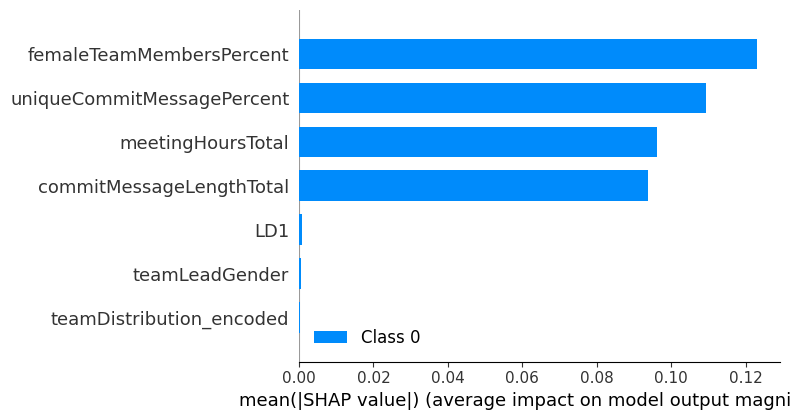

In [20]:
import numpy as np
import shap
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

feature_names = ["femaleTeamMembersPercent", "LD1", "uniqueCommitMessagePercent", "meetingHoursTotal", "commitMessageLengthTotal", "teamLeadGender","teamDistribution_encoded", "productLetterGrade_encoded"]

explainer = shap.DeepExplainer(model1, X_train)
shap_values = explainer.shap_values(X_test)



shap.summary_plot(shap_values, X_test, feature_names=feature_names)